In [33]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro
from statsmodels.stats.stattools import durbin_watson
from imblearn import FunctionSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import anderson
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix

# Import Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data From Drive

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Creditcard_data.csv")

print("Sample Data:")
print(df.head())


Sample Data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

# View Statistics of Data

In [36]:
# Check basic statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
             Time          V1          V2          V3          V4          V5  \
count  772.000000  772.000000  772.000000  772.000000  772.000000  772.000000   
mean   283.005181   -0.176963    0.217169    0.875172    0.285628   -0.005029   
std    171.834196    1.294724    1.173401    1.031878    1.258758    1.098143   
min      0.000000   -6.093248  -12.114213   -5.694973   -4.657545   -6.631951   
25%    126.500000   -0.896416   -0.174684    0.308677   -0.460058   -0.534567   
50%    282.000000   -0.382618    0.285843    0.905435    0.395919   -0.116612   
75%    432.000000    1.110739    0.885745    1.532969    1.117559    0.452818   
max    581.000000    1.586093    5.267376    3.772857    4.075817    7.672544   

               V6          V7          V8          V9  ...         V21  \
count  772.000000  772.000000  772.000000  772.000000  ...  772.000000   
mean     0.159081    0.123329   -0.057547   -0.030384  ...    0.004888   
std      1.225682    0.

# Check Skewness And Kurtosis

In [37]:
# Check skewness and kurtosis
print("\nSkewness:")
print(skew(df.drop("Class", axis=1)))
print("\nKurtosis:")
print(kurtosis(df.drop("Class", axis=1)))



Skewness:
[ 5.23482863e-02 -9.44983557e-01 -2.39863514e+00 -8.24925664e-01
 -2.62134725e-01  6.14790558e-01  1.60440599e+00  3.55827642e-01
 -3.72420617e+00  1.03325568e+00  3.57626870e+00  1.80659023e-01
 -4.34617085e-01 -1.72785314e-01 -2.58190317e+00 -6.44980569e-01
 -6.09977444e-01  3.08680473e-02  9.91110959e-02  8.78078797e-03
  4.45866528e+00  3.53501686e+00 -1.70593706e-01  8.37615662e-02
 -6.40715679e-01 -3.83996838e-01  1.10293323e+00  4.12122623e-01
 -3.22920653e+00  1.07037964e+01]

Kurtosis:
[-1.25831964e+00  1.62101966e+00  1.96011303e+01  3.06376356e+00
  8.43077901e-01  6.97399262e+00  2.88089460e+00  5.83843296e+00
  2.14021666e+01  5.58108913e+00  2.54716916e+01 -5.75033726e-01
  8.73625678e-01 -3.22426201e-01  1.10784624e+01  6.27667704e-01
  7.69238529e-01  7.99451411e+00  1.18610902e+00  8.09283751e-01
  4.80113624e+01  2.90864815e+01  5.28430089e-01  2.98372863e+01
  7.22479994e-02  2.32598096e-01  3.62139957e+00  1.94044003e+01
  3.00402678e+01  1.74647813e+02]


# Perform Autocorrelation And Normality Tests

In [38]:
# Check normality using Shapiro-Wilk test
normality_test_result = df.apply(lambda col: shapiro(col)[1])
print("\nNormality Test (Shapiro-Wilk):")
print(normality_test_result)

# Check Anderson-Darling test for normality
anderson_test_result = df.apply(lambda col: anderson(col)[0])
print("\nAnderson-Darling Test:")
print(anderson_test_result)

# Check autocorrelation using Durbin-Watson statistic
autocorrelation_test_result = durbin_watson(df.drop("Class", axis=1))
print("\nAutocorrelation Test (Durbin-Watson):")
print(autocorrelation_test_result)


Normality Test (Shapiro-Wilk):
Time      3.756757e-16
V1        7.454592e-23
V2        1.632101e-27
V3        7.341871e-13
V4        3.202947e-07
V5        2.126740e-20
V6        2.681251e-26
V7        1.599252e-19
V8        1.089943e-36
V9        5.069781e-18
V10       5.598535e-33
V11       7.592160e-07
V12       8.627810e-06
V13       1.068262e-02
V14       6.960593e-30
V15       4.993966e-10
V16       3.445795e-09
V17       2.222775e-21
V18       3.896223e-08
V19       7.987574e-04
V20       7.614312e-37
V21       8.532073e-39
V22       4.874197e-03
V23       3.651649e-34
V24       4.054394e-13
V25       1.311673e-05
V26       4.076913e-17
V27       3.194741e-31
V28       1.369261e-36
Amount    0.000000e+00
Class     0.000000e+00
dtype: float64

Anderson-Darling Test:
Time       10.785138
V1         22.994836
V2         20.582436
V3          3.291596
V4          3.847354
V5         13.555996
V6         34.418135
V7         10.066882
V8         67.818386
V9          7.855015
V10   

# Determine if data is balanced or imbalanced

In [39]:
# Split data into features (X) and target variable (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Check class distribution
class_distribution = y.value_counts()
print("\nClass Distribution:")
print(class_distribution)

# Determine if the data is balanced or imbalanced
is_imbalanced = class_distribution[1] / class_distribution.sum() > 0.001  # Adjust threshold as needed
print("\nIs the Data Imbalanced?")
print("Yes" if is_imbalanced else "No")


Class Distribution:
0    763
1      9
Name: Class, dtype: int64

Is the Data Imbalanced?
Yes


# Plot Class Distribution And Histograms

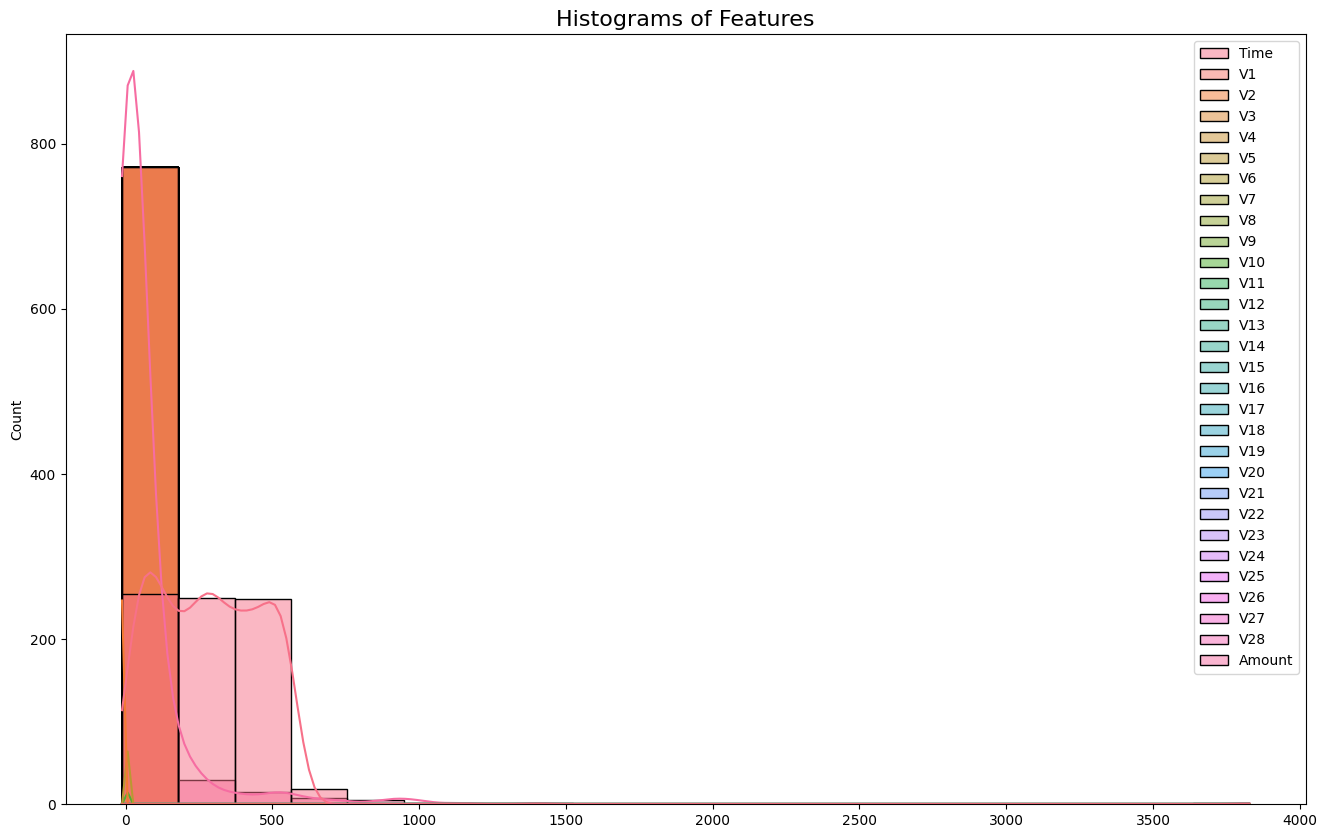

<Figure size 1200x800 with 0 Axes>

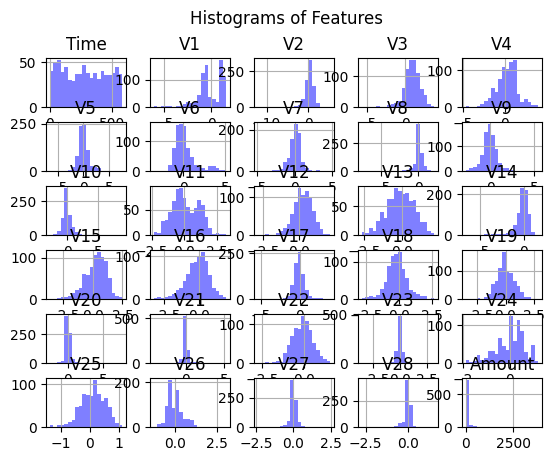

<ipython-input-40-87a92f7b1655>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


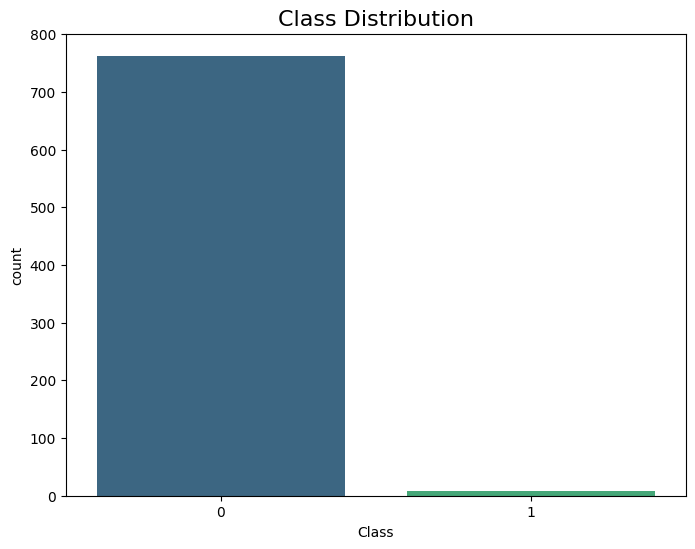

In [40]:
plt.figure(figsize=(16, 10))
plt.title('Histograms of Features', fontsize=16)
sns.histplot(data=df.drop("Class", axis=1), bins=20, kde=True, color='skyblue')
plt.show()

plt.figure(figsize=(12, 8))
df.drop("Class", axis=1).hist(bins=20, color='blue', alpha=0.5)
plt.suptitle('Histograms of Features')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution', fontsize=16)
plt.show()

# Perform Over Sampling

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)

print("Class Distribution After Random Oversampling:")
print(pd.Series(y_train_resampled).value_counts())


Class Distribution After Random Oversampling:
0    609
1    609
Name: Class, dtype: int64


# Create 5 different samples using different techniques

In [42]:
random_seed = 42

# Define the sample size
sample_size = 0.2  # Adjust as needed

srs_df = df.sample(frac=sample_size, random_state=random_seed)
print("Simple Random Sampling:")
print(srs_df.head())

# Technique 2: Stratified Sampling
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=sample_size, random_state=random_seed)
for _, srs_index in stratified_split.split(df, df['Class']):
    stratified_df = df.loc[srs_index]
print("\nStratified Sampling:")
print(stratified_df.head())

# Technique 3: Random Sampling using train_test_split
random_train_df, _ = train_test_split(df, test_size=sample_size, random_state=random_seed)
print("\nRandom Sampling (train_test_split):")
print(random_train_df.head())

# Technique 4: Random Sampling using ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=1, test_size=sample_size, random_state=random_seed)
for _, srs_index in shuffle_split.split(df):
    shuffle_df = df.loc[srs_index]
print("\nRandom Sampling (ShuffleSplit):")
print(shuffle_df.head())

# Technique 5: Simple Random Sampling without Replacement
srs_no_replace_df = df.sample(frac=sample_size, replace=False, random_state=random_seed)
print("\nSimple Random Sampling (No Replacement):")
print(srs_no_replace_df.head())

# Display the sample sizes
print("Sample Sizes:")
print("Simple Random Sampling:", len(srs_df))
print("Stratified Sampling:", len(stratified_df))
print("Random Sampling (train_test_split):", len(random_train_df))
print("Random Sampling (ShuffleSplit):", len(shuffle_df))
print("Simple Random Sampling (No Replacement):", len(srs_no_replace_df))


Simple Random Sampling:
     Time        V1        V2        V3        V4        V5        V6  \
538   404  0.638806  1.772451 -1.748258  1.297700  1.785872 -1.050197   
213   140  1.007947 -1.289492  0.666741 -0.741321 -1.290523  0.302172   
361   265  0.073631  1.051207 -0.281223  0.853749  1.065966  1.219197   
417   302 -0.986171  1.732934  0.857587  0.178950 -0.794223 -0.088469   
582   434 -0.679293  1.120837  1.319394  1.249827  1.147786 -0.086534   

           V7        V8        V9  ...       V21       V22       V23  \
538  1.485730 -0.780631  0.416991  ... -0.359613 -0.061540 -0.051428   
213 -1.026907  0.220562 -0.607465  ...  0.530549  1.113561 -0.260042   
361 -1.225597 -2.262214 -0.584441  ... -1.150128  0.870673 -0.266733   
417 -1.266790 -4.922224  0.010309  ...  4.332858 -2.331390  0.568103   
582  1.001436 -0.039752 -1.374497  ...  0.067521  0.030112 -0.296954   

          V24       V25       V26       V27       V28  Amount  Class  
538 -0.764738 -0.424181 -0.418629

# Evaluate Performances of various models on each sample

In [43]:
models = [
    RandomForestClassifier(random_state=random_seed),
    LogisticRegression(random_state=random_seed),
    SVC(random_state=random_seed),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=random_seed)
]

confusion_matrices = {}

# Iterate through each sampling technique
for i, (sample_df, sample_name) in enumerate(zip([srs_df, stratified_df, random_train_df, shuffle_df, srs_no_replace_df],
                                                ["Simple Random Sampling", "Stratified Sampling", "Random Sampling (train_test_split)",
                                                 "Random Sampling (ShuffleSplit)", "Simple Random Sampling (No Replacement)"])):
    # Split the sample into features (X) and target variable (y)
    X_sample = sample_df.drop("Class", axis=1)
    y_sample = sample_df["Class"]

    # Binarize the target variable for multi-class classification models
    if len(y_sample.unique()) > 2:
        y_sample = label_binarize(y_sample, classes=[0, 1])

    # Split the sample into training and testing sets
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample,
                                                                                    test_size=0.2, random_state=random_seed)

    # Dictionary to store confusion matrix for each model
    model_conf_matrices = {}

    # Iterate through each machine learning model
    for j, model in enumerate(models):
        # Train the model
        model.fit(X_train_sample, y_train_sample)

        # Make predictions on the test set
        y_pred_sample = model.predict(X_test_sample)

        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
        model_conf_matrices[f"Model{j + 1}"] = conf_matrix

    confusion_matrices[sample_name] = model_conf_matrices

# Display the confusion matrices
for sample_name, model_conf_matrices in confusion_matrices.items():
    print(f"\nConfusion Matrices for {sample_name}:")
    for model_name, conf_matrix in model_conf_matrices.items():
        print(f"{model_name}:\n{conf_matrix}")


metrics_matrix = {}

# Metrics to calculate
metrics_list = ['Precision', 'Recall', 'Accuracy']

# Iterate through each sampling technique
for i, (sample_df, sample_name) in enumerate(zip([srs_df, stratified_df, random_train_df, shuffle_df, srs_no_replace_df],
                                                ["Simple Random Sampling", "Stratified Sampling", "Random Sampling (train_test_split)",
                                                 "Random Sampling (ShuffleSplit)", "Simple Random Sampling (No Replacement)"])):
    # Split the sample into features (X) and target variable (y)
    X_sample = sample_df.drop("Class", axis=1)
    y_sample = sample_df["Class"]

    # Binarize the target variable for multi-class classification models
    if len(y_sample.unique()) > 2:
        y_sample = label_binarize(y_sample, classes=[0, 1])

    # Split the sample into training and testing sets
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample,
                                                                                    test_size=0.2, random_state=random_seed)

    # Dictionary to store metrics for each model
    model_metrics = {}

    # Iterate through each machine learning model
    for j, model in enumerate(models):
        # Train the model
        model.fit(X_train_sample, y_train_sample)

        # Make predictions on the test set
        y_pred_sample = model.predict(X_test_sample)

        # Calculate metrics
        precision = precision_score(y_test_sample, y_pred_sample, zero_division=1)
        recall = recall_score(y_test_sample, y_pred_sample, zero_division=1)
        accuracy = accuracy_score(y_test_sample, y_pred_sample)
        # roc_auc = roc_auc_score(y_test_sample, model.predict_proba(X_test_sample)[:, 1])

        model_metrics[f"Model{j + 1}"] = {'Precision': precision,
                                           'Recall': recall,
                                           'Accuracy': accuracy,
                                          #  'ROC-AUC': roc_auc
                                          }

    metrics_matrix[sample_name] = model_metrics

# Display the metrics matrix
metrics_df = pd.DataFrame.from_dict({(i, j): metrics_matrix[i][j]
                                     for i in metrics_matrix.keys()
                                     for j in metrics_matrix[i].keys()},
                                    orient='index')
print("\nMetrics Matrix:")
print(metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Confusion Matrices for Simple Random Sampling:
Model1:
[[31]]
Model2:
[[31]]
Model3:
[[31]]
Model4:
[[31]]
Model5:
[[31]]

Confusion Matrices for Stratified Sampling:
Model1:
[[31]]
Model2:
[[31]]
Model3:
[[31]]
Model4:
[[31]]
Model5:
[[31]]

Confusion Matrices for Random Sampling (train_test_split):
Model1:
[[121   0]
 [  3   0]]
Model2:
[[121   0]
 [  3   0]]
Model3:
[[121   0]
 [  3   0]]
Model4:
[[121   0]
 [  3   0]]
Model5:
[[119   2]
 [  3   0]]

Confusion Matrices for Random Sampling (ShuffleSplit):
Model1:
[[31]]
Model2:
[[31]]
Model3:
[[31]]
Model4:
[[31]]
Model5:
[[30  1]
 [ 0  0]]

Confusion Matrices for Simple Random Sampling (No Replacement):
Model1:
[[31]]
Model2:
[[31]]
Model3:
[[31]]
Model4:
[[31]]
Model5:
[[31]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Metrics Matrix:
                                                Precision  Recall  Accuracy
Simple Random Sampling                  Model1        1.0     1.0  1.000000
                                        Model2        1.0     1.0  1.000000
                                        Model3        1.0     1.0  1.000000
                                        Model4        1.0     1.0  1.000000
                                        Model5        1.0     1.0  1.000000
Stratified Sampling                     Model1        1.0     1.0  1.000000
                                        Model2        1.0     1.0  1.000000
                                        Model3        1.0     1.0  1.000000
                                        Model4        1.0     1.0  1.000000
                                        Model5        1.0     1.0  1.000000
Random Sampling (train_test_split)      Model1        1.0     0.0  0.975806
                                        Model2        1.0     0.0  0.97

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Generate a Result matrix based on area under the precision-recall curve (AUC-PR).

## AUC-PR is preferred for imbalanced datasets

In [44]:
from sklearn.metrics import precision_recall_curve, auc

# Dictionary to store AUC-PR scores for each model
auc_pr_scores = {}

# Iterate through each sampling technique
for i, (sample_df, sample_name) in enumerate(zip([srs_df, stratified_df, random_train_df, shuffle_df, srs_no_replace_df],
                                                ["Simple Random Sampling", "Stratified Sampling", "Random Sampling (train_test_split)",
                                                 "Random Sampling (ShuffleSplit)", "Simple Random Sampling (No Replacement)"])):
    # Split the sample into features (X) and target variable (y)
    X_sample = sample_df.drop("Class", axis=1)
    y_sample = sample_df["Class"]

    # Binarize the target variable for multi-class classification models
    if len(y_sample.unique()) > 2:
        y_sample = label_binarize(y_sample, classes=[0, 1])

    # Split the sample into training and testing sets
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample,
                                                                                    test_size=0.2, random_state=random_seed)

    # Dictionary to store AUC-PR score for each model
    model_auc_pr_scores = {}

    # Iterate through each machine learning model
    for j, model in enumerate(models):
        # Train the model
        model.fit(X_train_sample, y_train_sample)

        # Make predictions on the test set
        if hasattr(model, "predict_proba"):
            y_score_sample = model.predict_proba(X_test_sample)[:, 1]
        else:
            y_score_sample = model.decision_function(X_test_sample)

        # Calculate precision-recall curve
        precision, recall, _ = precision_recall_curve(y_test_sample, y_score_sample)

        # Calculate AUC-PR
        auc_pr = auc(recall, precision)
        model_auc_pr_scores[f"Model{j + 1}"] = auc_pr

    auc_pr_scores[sample_name] = model_auc_pr_scores

# Display the AUC-PR scores
for sample_name, model_auc_pr_scores in auc_pr_scores.items():
    print(f"\nAUC-PR Scores for {sample_name}:")
    for model_name, auc_pr in model_auc_pr_scores.items():
        print(f"{model_name}: {auc_pr:.4f}")

auc_pr_df = pd.DataFrame(index=models)

# Iterate through each sampling technique
for sample_name, model_auc_pr_scores in auc_pr_scores.items():
    # Extract AUC-PR scores for each model and round to 4 decimal places
    auc_pr_values = [round(model_auc_pr_scores.get(f"Model{i + 1}", 0), 4) for i in range(len(models))]

    # Add a new column for the current sampling technique
    auc_pr_df[sample_name] = auc_pr_values

# Save the DataFrame to a CSV file with floating-point values rounded to 4 decimal places
auc_pr_df.to_csv('auc_pr_results.csv', float_format='%.4f')

# Display the DataFrame
print(auc_pr_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is 


AUC-PR Scores for Simple Random Sampling:
Model1: 0.5000
Model2: 0.5000
Model3: 0.5000
Model4: 0.5000
Model5: 0.5000

AUC-PR Scores for Stratified Sampling:
Model1: 0.5000
Model2: 0.5000
Model3: 0.5000
Model4: 0.5000
Model5: 0.5000

AUC-PR Scores for Random Sampling (train_test_split):
Model1: 0.0746
Model2: 0.0382
Model3: 0.0352
Model4: 0.0121
Model5: 0.0121

AUC-PR Scores for Random Sampling (ShuffleSplit):
Model1: 0.5000
Model2: 0.5000
Model3: 0.5000
Model4: 0.5000
Model5: 0.5000

AUC-PR Scores for Simple Random Sampling (No Replacement):
Model1: 0.5000
Model2: 0.5000
Model3: 0.5000
Model4: 0.5000
Model5: 0.5000
                                                    Simple Random Sampling  \
(DecisionTreeClassifier(max_features='sqrt', ra...                     0.5   
LogisticRegression(random_state=42)                                    0.5   
SVC(random_state=42)                                                   0.5   
KNeighborsClassifier()                                          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is 